### 603060 国检集团
##### 加权平均净资产收益率

| 2019 | 2018 | 2017 |
| ---- | ---- | ---- |
| 16.47% | 17.91% | 14.79% |

##### 2020-12-14
* 最初模版

In [12]:
ticker = '603060'

In [13]:
%%html
<style>
table {float:left}
</style>

In [14]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import baostock

sys.path.append(os.path.join(os.path.expanduser('~'), 'GitHub', 'stock'))
import script.data as data
import script.utils as utils
import script.bsutil as bu
from script.figure import draw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
baostock.login()
code = bu.get_bs_code(ticker)
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)
mkt = bu.get_price_daily(code)
bs = data.get_BS(ticker)
baostock.logout()

login success!
logout success!


In [16]:
change = utils.column_pct(income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']], periods=-1)
income_change = pd.concat([income[['截止日期', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change.set_index('截止日期')

,基本每股收益,稀释每股收益,营业总收入,营业总成本,归属于母公司所有者的净利润
截止日期,,,,,
2019-12-31,0.6765,0.6765,"1,107,279,854 ( 12.4%)","878,333,671 ( 14.0%)","208,350,331 ( 3.7%)"
2018-12-31,0.6525,0.6525,"984,857,957 ( 30.9%)","770,554,216 ( 28.3%)","200,979,355 ( 39.4%)"
2017-12-31,0.6556,0.6556,"752,408,926 ( 13.1%)","600,734,578 ( 12.6%)","144,224,161 ( 24.6%)"
2016-12-31,0.6827,0.6827,"665,011,422 ( 11.4%)","533,672,751 ( 13.9%)","115,773,356 ( 10.4%)"
2015-12-31,0.6356,0.6356,"597,037,872 ( 12.9%)","468,512,102 ( 9.8%)","104,879,188 ( 23.2%)"
2014-12-31,NaN,NaN,"528,809,681 ( 9.1%)","426,673,517 ( 9.1%)","85,142,113 ( 9.4%)"
2013-12-31,NaN,NaN,"484,907,942 ( nan%)","391,034,528 ( nan%)","77,841,809 ( nan%)"


In [17]:
change = utils.column_pct(incomeq[['营业收入', '归属于母公司所有者的净利润']], periods=-4)
incomeq_change = pd.concat([incomeq[['截止日期']], change], axis=1)
incomeq_change[:24].set_index('截止日期')

,营业收入,归属于母公司所有者的净利润
截止日期,,
2020-09-30,"371,037,176 ( 52.8%)","77,199,175 ( 87.6%)"
2020-06-30,"303,355,492 ( 18.1%)","75,013,159 ( 13.6%)"
2020-03-31,"174,771,305 (-21.2%)","-36,905,832 (-258.1%)"
2019-12-31,"411,082,685 ( 14.8%)","81,884,011 ( 34.3%)"
2019-09-30,"242,794,026 ( 3.9%)","41,144,172 (-31.9%)"
2019-06-30,"256,933,672 ( 16.5%)","66,016,345 ( 9.7%)"
2019-03-31,"221,713,091 ( 28.6%)","23,346,263 ( 20.2%)"
2018-12-31,"358,208,520 ( 58.1%)","60,969,161 ( 62.4%)"
2018-09-30,"233,773,305 ( 25.7%)","60,386,963 ( 20.9%)"


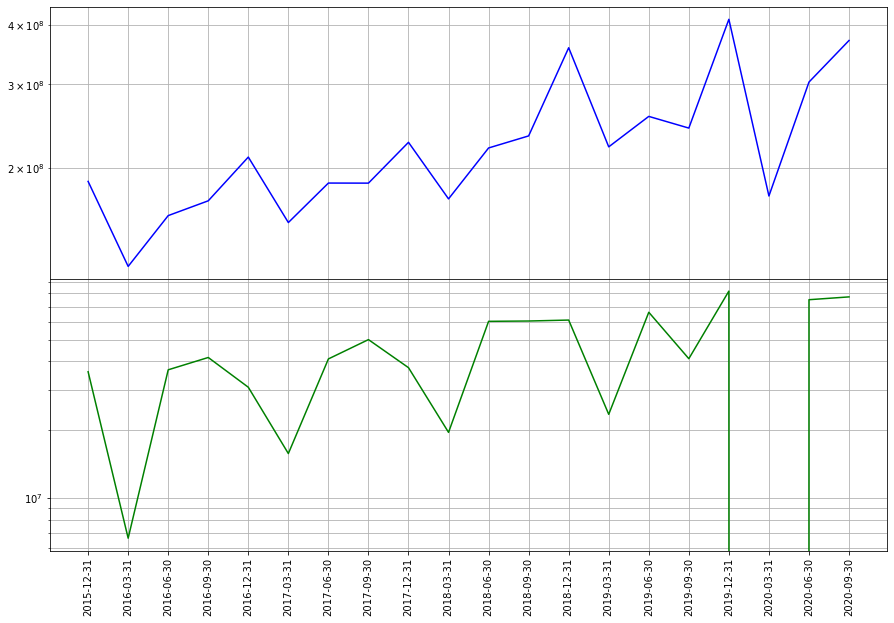

In [18]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['归属于母公司所有者的净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [19]:
income['毛利率'] = (1 - income['营业成本'] / income['营业收入']).round(3) * 100
income['净利率'] = (income['净利润'] / income['营业总收入']).round(3) * 100
income.set_index('截止日期')[['毛利率', '净利率']]

,毛利率,净利率
截止日期,,
2019-12-31,45.3,21.4
2018-12-31,46.1,22.7
2017-12-31,46.0,20.6
2016-12-31,47.6,19.2
2015-12-31,46.7,19.8
2014-12-31,45.6,17.9
2013-12-31,47.4,17.3


In [20]:
change = utils.column_pct(bs[['存货', '应付账款', '应收账款']], periods=-1)
bs_change = pd.concat([bs[['截止日期']], change], axis=1)
bs_change.set_index('截止日期', inplace=True)
change = utils.column_pct(income[['营业收入']], periods=-1)
income_change = pd.concat([income[['截止日期']], change], axis=1)
income_change.set_index('截止日期', inplace=True)
pd.concat([income_change, bs_change], axis=1)

,营业收入,存货,应付账款,应收账款
截止日期,,,,
2019-12-31,"1,107,279,854 ( 12.4%)","28,598,041 ( 50.6%)","40,111,803 ( 84.1%)","174,672,353 ( 32.2%)"
2018-12-31,"984,857,957 ( 30.9%)","18,989,929 ( 56.7%)","21,785,134 (-18.4%)","132,133,012 ( 46.9%)"
2017-12-31,"752,408,926 ( 13.1%)","12,117,746 ( -3.7%)","26,684,897 ( 10.4%)","89,932,351 ( 33.6%)"
2016-12-31,"665,011,422 ( 11.4%)","12,589,578 (111.2%)","24,173,549 ( 61.4%)","67,335,435 ( 15.9%)"
2015-12-31,"597,037,872 ( 12.9%)","5,961,471 (-17.4%)","14,975,145 ( 10.0%)","58,118,663 ( 28.9%)"
2014-12-31,"528,809,681 ( 9.1%)","7,215,784 (-16.7%)","13,610,642 ( 29.1%)","45,098,704 ( 18.1%)"
2013-12-31,"484,907,942 ( nan%)","8,664,831 ( nan%)","10,539,377 ( nan%)","38,201,523 ( nan%)"


In [21]:
mkt['前复权'] = mkt['close'].round(2)
mkt['滚动市盈率'] = mkt['peTTM'].round(1)
mkt['交易日期'] = pd.to_datetime(mkt['date'])
df = mkt[['前复权', '滚动市盈率']].groupby(mkt['交易日期'].dt.year).agg(['min', 'max', 'first', 'last'])[-10:]
df['前复权增长'] = df['前复权'][['first', 'last']].apply(lambda x: round((x[1]-x[0])/x[0] * 100,1), axis=1)
df.drop(columns=[('前复权', 'min'), ('前复权', 'max'), ('滚动市盈率', 'first'), ('滚动市盈率', 'last')])


前复权        滚动市盈率        前复权增长
      first   last   min   max       
交易日期                                 
2016   7.13  17.44  26.3  93.3  144.6
2017  17.89  10.81  33.6  72.3  -39.6
2018  10.87   9.78  19.5  36.6  -10.0
2019   9.48  17.21  22.4  42.1   81.5
2020  17.13  19.02  27.1  66.5   11.0

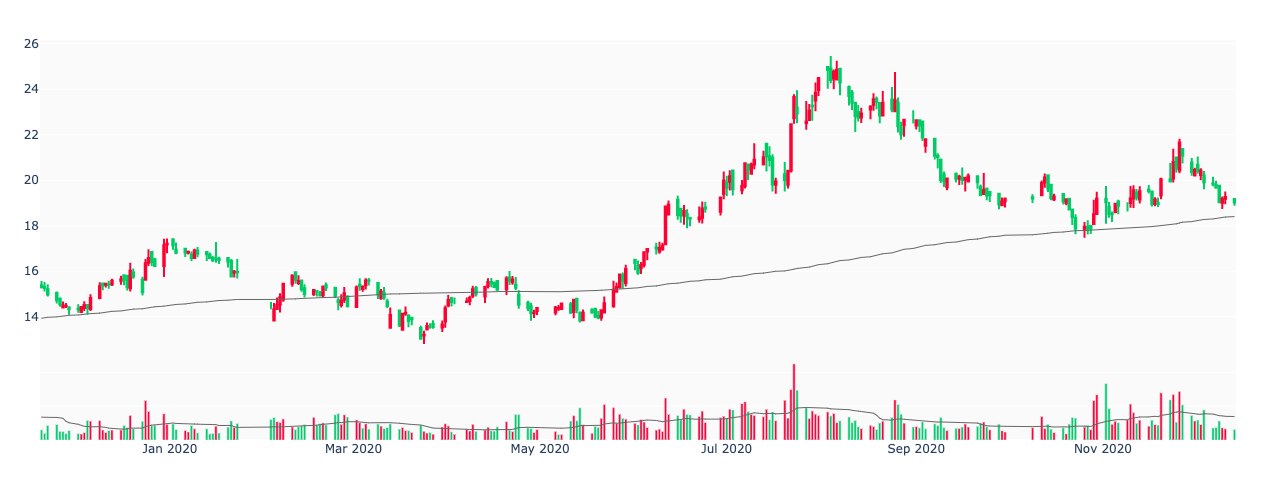

In [22]:
draw(mkt, 260, 200, 20)